## This script is used to draw some distribution pictures of training data

In [1]:
import numpy as np
import pandas as pd
from collections import Counter

df = pd.read_csv('/hpcfs/juno/junogpu/fuys/yuntianchi/xu/tianchi_channel_1/tcdata/train.csv',sep="\|,\|",names=["id","report","label"],index_col=0)
report_value = df['report'].values
#report_value = df['report'].loc[0:5].values

ipykernel_launcher:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [2]:
import math
import matplotlib.pyplot as plt
collect=[]

dict_idf = {i:0 for i in range(858)}
for report_ in report_value:
    for key in dict_idf.keys():
        if str(key) in report_:
            dict_idf[key]+=1

for report in report_value:

    words = report.split()
    sentence=[]
    for word in words:
        sentence.append(int(word))
    dict_sent = Counter(sentence)

    for element in dict_sent.keys():
        dict_sent[element] = (dict_sent[element]/len(sentence))*math.log10(len(report_value)/dict_idf[element])
    dict_sent_new = sorted(dict_sent.items(), key=lambda x: x[1], reverse=True)
    
    remove_report=[]
    for index in range(len(dict_sent_new)):
        remove_report.append(dict_sent_new[index][1])
        collect.append(dict_sent_new[index][1])
    remove_report = [str(i) for i in remove_report[-2:]]
    processed_report = []

    for word in words:
        if word not in remove_report:
            processed_report.append(word)

print('everything is ok!')

everything is ok!


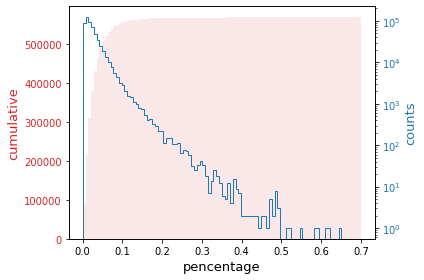

In [3]:
fig, ax1 = plt.subplots()

color = 'tab:red'
xmax = 0.7
ax1.set_xlabel('pencentage',size=13)
ax1.set_ylabel('cumulative', color=color,size=13)
ax1.hist(collect,bins=100,range=(0,xmax),cumulative=True,color=color,alpha=0.1)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('counts', color=color,size=13)  # we already handled the x-label with ax1
ax2.hist(collect,bins=100,range=(0,xmax),log=True,color=color,histtype='step')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

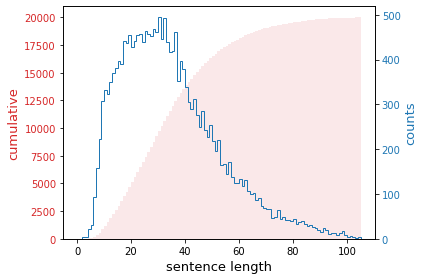

In [4]:
sentence_len=[]
for report in report_value:
    sentence_len.append(len(report.split()))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('sentence length',size=13)
ax1.set_ylabel('cumulative', color=color,size=13)
ax1.hist(sentence_len,bins=105,range=(0,105),color=color,cumulative=True,alpha=0.1)#,histtype='step')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('counts', color=color,size=13)  # we already handled the x-label with ax1
ax2.hist(sentence_len,bins=105,range=(0,105),color=color,histtype='step')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped